In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('msc_data_cleaned.csv')

In [2]:
def clean_age(x):
    if '51-60' in x or '60+' in x:
        return '51-60'
    if '41-45' in x or '46-50' in x:
        return '41-50'
    if '31-35' in x or '36-40' in x:
        return '31-40'
    if '21-25' in x or '26-30' in x:
        return '21-30'
    return 'Under 20'

dataset['age_cat'] = dataset['age_cat'].apply(clean_age)

In [3]:
indexes = dataset[ (dataset['package'] != 'CRBT_SRV') & (dataset['package'] != 'MQSM')  & (dataset['package'] != 'B2W')
                   ].index
dataset.drop(indexes,inplace=True)

indexesLanguage1 = dataset[(dataset['language_id'] != 2002) & (dataset['language_id'] != 2078) & (dataset['language_id'] !=2079)].index
dataset.drop(indexesLanguage1,inplace=True)

In [4]:
dataset = dataset.dropna(subset=['device_type'])

In [5]:
def clean_deviceType(x):
    if 'BASIC' in x:
        return 'BASIC'
    if 'SMART' in x:
        return 'SMART'
    if 'FEATURE' in x:
        return 'FEATURE'

dataset['device_type'] = dataset['device_type'].apply(clean_deviceType)

In [6]:
sin= 2078.0
eng = 2002.0
# tam = 2079.0
def clean_language(x):
    if sin in [x]:
        return 'Sinhala'
    if eng in [x]:
        return 'English'
    return 'Tamil'

dataset['language_id'] = dataset['language_id'].apply(clean_language)

In [7]:
def clean_connectionAge(x):
    if 'more than 5 years' in x:
        return 'more than 5 years'
    if '3-5 years' in x:
        return '3-5 years'
    if '2-3 years' in x or '1-2 years' in x:
        return '1-3 years'
    return 'less than 1'

dataset['con_age'] = dataset['con_age'].apply(clean_connectionAge)

In [8]:
dataset = dataset.drop(['customer_id'],axis=1)
#print(dataset)

        package  gender age_cat            con_age language_id  \
4          MQSM       0   51-60        less than 1     English   
10     CRBT_SRV       0   31-40          1-3 years     Sinhala   
13         MQSM       1   41-50        less than 1     English   
17     CRBT_SRV       1   41-50          1-3 years     English   
21     CRBT_SRV       0   51-60        less than 1     English   
...         ...     ...     ...                ...         ...   
92013       B2W       0   51-60  more than 5 years     English   
92018  CRBT_SRV       1   51-60  more than 5 years     Sinhala   
92019  CRBT_SRV       1   51-60  more than 5 years     Sinhala   
92023  CRBT_SRV       0   51-60          3-5 years     English   
92024  CRBT_SRV       0   21-30          1-3 years     English   

       total_voice_usage_min  total_data_usage_mb device_type  total_revenue  \
4                      76.25             12177.65       SMART        1319.92   
10                    143.83              7318.

In [9]:
dataset.to_excel("cleaned_data3.xlsx")

In [11]:
from sklearn.preprocessing import LabelEncoder
# labelEncoder = LabelEncoder()
dataTransform = dataset.copy()

In [12]:
le_language = LabelEncoder()
dataTransform['language_id'] = le_language.fit_transform(dataset['language_id'])
le_age = LabelEncoder()
dataTransform['age_cat'] = le_age.fit_transform(dataset['age_cat'])
le_conAge = LabelEncoder()
dataTransform['con_age'] = le_conAge.fit_transform(dataset['con_age'])
le_device = LabelEncoder()
dataTransform['device_type'] = le_device.fit_transform(dataset['device_type'])
le_package = LabelEncoder()
dataTransform['package'] = le_package.fit_transform(dataset['package'])
dataTransform["package"].unique()


array([2, 1, 0])

In [13]:
dataTransform

,package,gender,age_cat,con_age,language_id,total_voice_usage_min,total_data_usage_mb,device_type,total_revenue,vas_revenue
4,2,0,3,2,0,76.25,12177.65,2,1319.92,226.67
10,1,0,1,0,1,143.83,7318.22,2,1357.65,143.43
13,2,1,2,2,0,128.55,0.21,2,277.25,154.28
17,1,1,2,0,0,15.27,20411.27,2,1797.99,190.03
21,1,0,3,2,0,825.47,0.00,1,1230.00,127.50
...,...,...,...,...,...,...,...,...,...,...
92013,0,0,3,3,0,320.47,2587.44,2,1017.33,179.72
92018,1,1,3,3,1,223.58,0.00,1,365.07,158.15
92019,1,1,3,3,1,616.03,0.00,0,884.65,115.15
92023,1,0,3,1,0,474.97,494.23,2,661.97,180.52


In [15]:
dataTransform.shape

(21781, 10)

In [16]:
dataTransform.to_excel("cleaned_data3.xlsx")

In [17]:
dataTransform1 = dataTransform.copy()
dtf = dataTransform1['package']
# Min-Max Normalization
df = dataTransform1.drop('package', axis=1)
dataTransform = dataTransform.drop('package', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())

df_norm.head()

,gender,age_cat,con_age,language_id,total_voice_usage_min,total_data_usage_mb,device_type,total_revenue,vas_revenue
4,0.0,0.75,0.666667,0.0,0.008460,0.098454,1.0,0.019094,0.003322
10,0.0,0.25,0.000000,0.5,0.015958,0.059166,1.0,0.019646,0.002089
13,1.0,0.50,0.666667,0.0,0.014263,0.000002,1.0,0.003819,0.002250
17,1.0,0.50,0.000000,0.0,0.001694,0.165021,1.0,0.026097,0.002780
21,0.0,0.75,0.666667,0.0,0.091588,0.000000,0.5,0.017776,0.001853


In [18]:
def boxplot_plot(df,feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

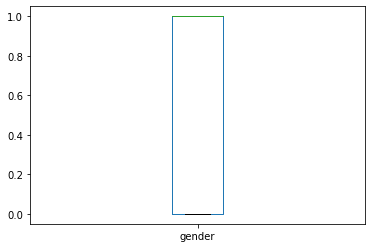

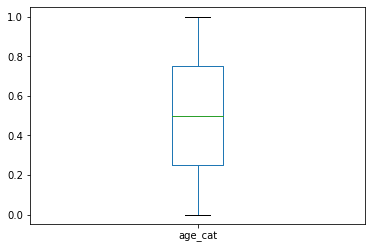

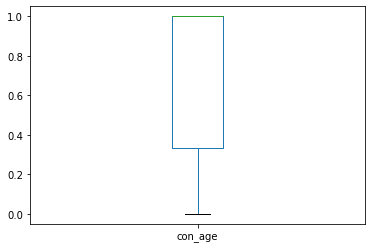

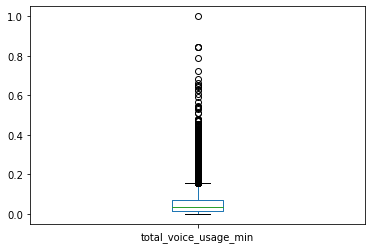

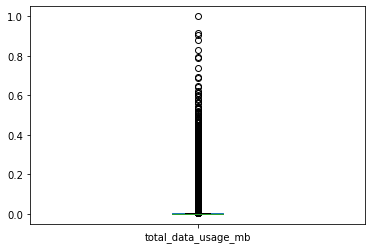

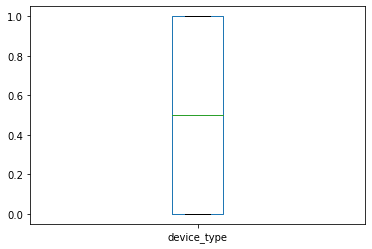

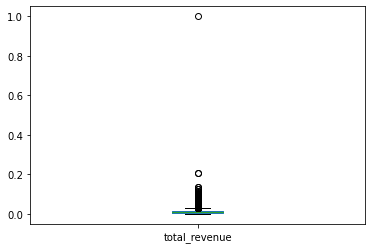

,gender,age_cat,con_age,language_id,total_voice_usage_min,total_data_usage_mb,device_type,total_revenue,vas_revenue
4,0.0,0.75,0.666667,0.0,0.008460,9.845378e-02,1.0,0.019094,0.003322
10,0.0,0.25,0.000000,0.5,0.015958,5.916630e-02,1.0,0.019646,0.002089
13,1.0,0.50,0.666667,0.0,0.014263,1.697807e-06,1.0,0.003819,0.002250
17,1.0,0.50,0.000000,0.0,0.001694,1.650209e-01,1.0,0.026097,0.002780
21,0.0,0.75,0.666667,0.0,0.091588,0.000000e+00,0.5,0.017776,0.001853
...,...,...,...,...,...,...,...,...,...
92013,0.0,0.75,1.000000,0.0,0.035557,2.091892e-02,1.0,0.014661,0.002627
92018,1.0,0.75,1.000000,0.5,0.024807,0.000000e+00,0.5,0.005106,0.002307
92019,1.0,0.75,1.000000,0.5,0.068350,0.000000e+00,0.0,0.012717,0.001670
92023,0.0,0.75,0.333333,0.0,0.052699,3.995747e-03,1.0,0.009455,0.002639


In [19]:
boxplot_plot(df_norm,'gender')
boxplot_plot(df_norm,'age_cat')
boxplot_plot(df_norm,'con_age')
boxplot_plot(df_norm,'total_voice_usage_min')
boxplot_plot(df_norm,'total_data_usage_mb')
boxplot_plot(df_norm,'device_type')
boxplot_plot(df_norm,'total_revenue')
#df_norm

In [20]:
def outliers(df,feature):
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    
    lowerBound = Q1 - 1.5*IQR
    uperBound  = Q3 + 1.5*IQR
    
    ls = df.index[(df[feature]<lowerBound) | (df[feature]>uperBound)]
    return ls

In [21]:
index_list = []
for f in ['total_voice_usage_min','total_data_usage_mb','total_revenue']:
    index_list.extend(outliers(df_norm,f))

In [23]:
def remove(df,ls):
    ls = sorted(set(ls))
    df =df.drop(ls)
    return df

In [24]:
cleand_df = remove(df_norm,index_list)

In [25]:
cleand_df.shape

(21584, 9)

In [26]:
result = pd.concat([cleand_df, dtf], axis=1, join='inner')
display(result)

,gender,age_cat,con_age,language_id,total_voice_usage_min,total_data_usage_mb,device_type,total_revenue,vas_revenue,package
4,0.0,0.75,0.666667,0.0,0.008460,9.845378e-02,1.0,0.019094,0.003322,2
10,0.0,0.25,0.000000,0.5,0.015958,5.916630e-02,1.0,0.019646,0.002089,1
13,1.0,0.50,0.666667,0.0,0.014263,1.697807e-06,1.0,0.003819,0.002250,2
17,1.0,0.50,0.000000,0.0,0.001694,1.650209e-01,1.0,0.026097,0.002780,1
21,0.0,0.75,0.666667,0.0,0.091588,0.000000e+00,0.5,0.017776,0.001853,1
...,...,...,...,...,...,...,...,...,...,...
92013,0.0,0.75,1.000000,0.0,0.035557,2.091892e-02,1.0,0.014661,0.002627,0
92018,1.0,0.75,1.000000,0.5,0.024807,0.000000e+00,0.5,0.005106,0.002307,1
92019,1.0,0.75,1.000000,0.5,0.068350,0.000000e+00,0.0,0.012717,0.001670,1
92023,0.0,0.75,0.333333,0.0,0.052699,3.995747e-03,1.0,0.009455,0.002639,1


In [27]:
result.to_excel("cleaned_data4.xlsx")